<a href="https://colab.research.google.com/github/rishuagrawal1309/Machine_Learning/blob/main/Customer_Churn_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd

In [29]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print("   ", filename)


/kaggle/input


In [31]:
df = pd.read_csv('Churn_Modelling.csv.xls')

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
print(df.shape)

(10000, 14)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [37]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [38]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [39]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace= True)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
 df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [42]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [43]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7943 - loss: 0.6067 - val_accuracy: 0.7969 - val_loss: 0.5195
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7999 - loss: 0.5113 - val_accuracy: 0.7969 - val_loss: 0.5090
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7994 - loss: 0.5042 - val_accuracy: 0.7969 - val_loss: 0.5050
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.5085 - val_accuracy: 0.7969 - val_loss: 0.5020
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.5033 - val_accuracy: 0.7969 - val_loss: 0.5000
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.5026 - val_accuracy: 0.7969 - val_loss: 0.4986
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5022 - val_accuracy: 0.7969 - val_loss: 0.4977
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7872 - loss: 0.5119 - val_accu

In [52]:
model.layers[0].get_weights()

[array([[-1.60122141e-01,  2.71017998e-01, -1.74148276e-01,
         -1.54760122e-01,  2.00822838e-02, -4.04577315e-01,
          2.35058904e-01, -2.84407467e-01,  5.53994238e-01,
         -1.93265423e-01, -3.52457523e-01],
        [ 2.48895269e-02, -3.65832806e-01,  2.03361616e-01,
         -4.29847866e-01, -4.74926978e-01,  8.77513289e-02,
         -2.61440694e-01, -9.17288288e-02, -4.49716836e-01,
          3.18221688e-01,  4.69950557e-01],
        [ 3.10957879e-01, -4.43650842e-01, -3.33679587e-01,
          3.49043071e-01, -1.94073588e-01,  5.12264907e-01,
          1.01028085e-01, -2.37307191e-01, -1.45709679e-01,
          2.49646693e-01,  2.27054775e-01],
        [-7.43572181e-03,  4.68355477e-01,  3.97409141e-01,
          2.70384014e-01,  6.34103417e-02, -5.07973075e-01,
          4.27263439e-01,  3.49420339e-01, -3.64251256e-01,
          4.12213743e-01, -9.18046236e-02],
        [ 5.00471234e-01,  2.10435778e-01,  2.91546673e-01,
         -3.41227591e-01, -3.14022869e-01,  

In [49]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [50]:
y_pred

array([[0.24344684],
       [0.24344684],
       [0.2345614 ],
       ...,
       [0.2345614 ],
       [0.24966145],
       [0.24344684]], dtype=float32)

In [56]:
np.where(y_pred>0.2,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_pred = y_pred.argmax(axis=-1)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

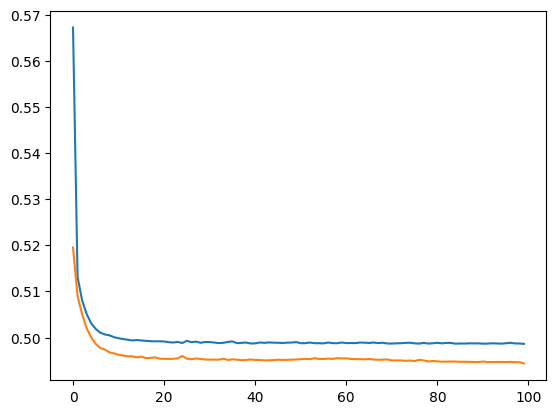

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

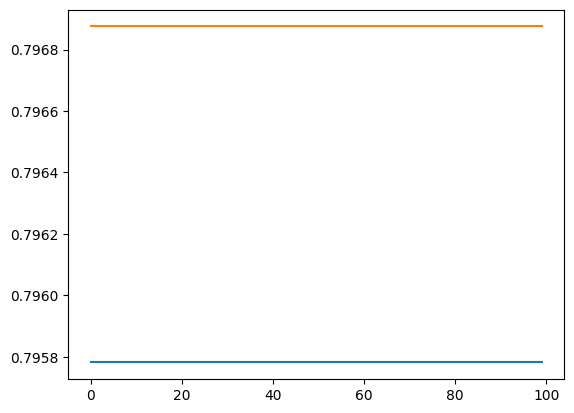

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])